<a href="https://colab.research.google.com/github/vdnew/Factors-can-influence-residentail-house-price/blob/main/Experiment_notebook_for_house_supply_and_demand_in_housing_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Forecasting Time Series for House Supply, Demand, House Price, New House price, House Supply Rate, Mortgage Rate, Cconsumer House Price and Others.**


I have forecasted the housing starts in the United States. Housing starts are the number of new residential construction projects that have begun in a month. I have chosen housing starts (New House Supply) as it is a leading indicator in the real estate or mortgage market. 

This forward looking variable estimates a good gague for future levels of real estate supply, and creates a ripple effect in the overall economy.

Its is primarily of interest as the inceptions and collapse of the housing bubble in 2007-08 were the turning points in the subsequent developments that embroiled the Americam in a deep-seated financial meltdown.

Buying new houses also increases the demand of complementary durable goods such as furniture, refrigerators, etc. Thus, new residential constructions boosts employment in construction, raw materials, banking and other manufacturing sectors. 

Mortgage rates directly affect housing activity hosuing activity as higher interest rates raise the housing expenses. 

This lowers the number of qualified borrowers, declining home sales, and housing starts. On the contrast, lower interest rates make houses affordable, spurring housing starts and hoe sales.

In [1]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)

In [2]:
data = pd.read_excel('/content/US_House_dataset.xlsx')

In [3]:
data.head()

,date,hous_st,CPI,mortgR,fed_fundsR,income,pvt_house_comp,sec_conL,real_estL,unempR,house_supply,new_house_Saleprice
0,1976-01-01,1367,52.6,9.0160,4.87,20092,1258,205.52079,134.995775,7.9,6.4,41600
1,1976-02-01,1538,52.8,8.8125,4.77,20203,1311,206.70929,136.105200,7.7,5.9,42700
2,1976-03-01,1421,52.9,8.7550,4.84,20251,1347,208.33857,137.876240,7.6,6.8,43600
3,1976-04-01,1395,53.1,8.7300,4.82,20263,1332,210.50006,139.842425,7.7,6.4,43300
4,1976-05-01,1459,53.2,8.7650,5.29,20248,1440,211.40742,140.843875,7.4,7.0,43600


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 516 non-null    datetime64[ns]
 1   hous_st              516 non-null    int64         
 2   CPI                  516 non-null    float64       
 3   mortgR               516 non-null    float64       
 4   fed_fundsR           516 non-null    float64       
 5   income               516 non-null    int64         
 6   pvt_house_comp       516 non-null    int64         
 7   sec_conL             516 non-null    float64       
 8   real_estL            516 non-null    float64       
 9   unempR               516 non-null    float64       
 10  house_supply         516 non-null    float64       
 11  new_house_Saleprice  516 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 48.5 KB


In [5]:
data.describe()

,hous_st,CPI,mortgR,fed_fundsR,income,pvt_house_comp,sec_conL,real_estL,unempR,house_supply,new_house_Saleprice
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,1393.833333,158.371771,8.061939,4.984554,31312.257752,1360.653101,1576.667791,1767.360618,6.301357,6.065116,163150.193798
std,403.799916,57.231907,3.344547,4.044073,7138.040877,369.932959,1099.212908,1417.859513,1.599702,1.680968,80317.219012
min,478.000000,52.600000,3.345000,0.070000,20092.000000,520.000000,205.520790,134.995775,3.700000,3.500000,41600.000000
25%,1121.500000,111.575000,5.706250,1.260000,25325.250000,1101.750000,649.904043,472.155555,5.100000,4.800000,94775.000000
50%,1450.000000,156.750000,7.558000,5.130000,30192.000000,1393.500000,1285.820275,1186.293927,5.900000,5.900000,145000.000000
75%,1680.250000,214.565750,9.990625,7.015000,37908.250000,1641.250000,2532.990510,3502.912155,7.400000,6.900000,228525.000000
max,2273.000000,262.088000,18.454000,19.100000,45274.000000,2245.000000,3995.056710,4416.191675,10.800000,12.200000,343400.000000


 # **Description of Data**

---






I have used monthly data of all variables from Federal Reserve Bank of St. Louis Economic Research (FRED)
from June 1976 to December 2018. The variables are:



1.   house_st: The number of of privetly owned housing
2.   CPI: The consumer price index measures the weighted average of prices of a fexed basked of consumer goods and services.
1.   mortgR: A 30 year mortgage rate that measures the interest rate changed when financing a new home.
2.   fed_fundsR: The fedral funds rate is the interest rate that banks charge other banks for overnight loan requests to meet the federal reserve requirement.
1.   income: The real disposable personal income per person on average
2.   pvt_house_comp: The number of new privetly owned houses completed
1.   sec_conL: The number of securitized total consumer loans outstanding Through securitization, financial institutions distribute various assets such as residential mortgages, and auto loans
to third party investors to generate a sustainable cash flow.
2.   real_estL: The number of real estate loans from all commercial banks.
1.   yield_sp: the difference between a 10 year treasury bond and a 2 year treasury bond.
2.   House_supply: Monthly supply of houses in the United States.
11. new_house_Saleprice: monthly new house sale price in the United States.











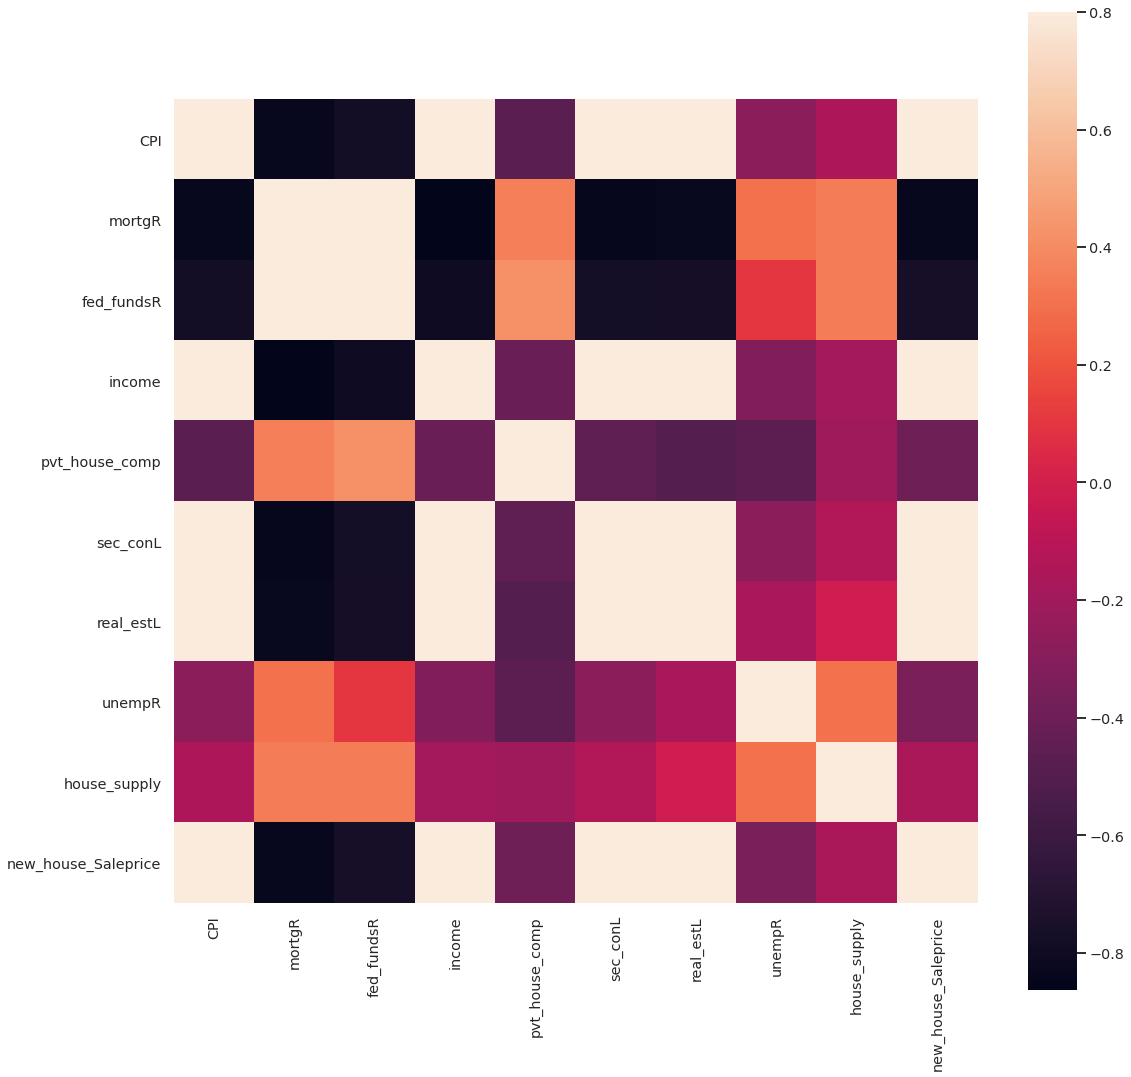

In [6]:
corr = data.select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, vmax=.8, square=True)

In [7]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm




---
# **ARIMA(X) Model**

A multivariate regression model is the ARIMAX model wherein the covariates - New house sale price, House supply rate into market, real estate loans, securitized consumer loans, persons income.

The ARIMAX(2,1,3) and ARIMAX(3,1,2) on above mentioned variables.

**P-value:** implying that the model is not serially correlated.

**Residuals:** The time plot of the residuals shows that the variance in the residuals are almost constant.

ARIMA(3,1,2) predicts the endogenous variable - housing starts using only its lags and the model is,

**B hous st .0488 B hous st .4336 B hous st .1437 B hous st .427 ε .8473 ε ,**

where ε is white noise.

The correlogram seems to follow discrete white noise. The p-value of 0.07732>0.05, fails to reject the null hypothesis that the residuals of ARIMA(3,1,2) is not serially correlated i.e. the series is white noise.


**Following variables ARIMA model performed:**


1.   New House Sale Price
2.   House Supply rate
3.   Real Mortgage Interest Rate
4.   Real Estate Loan
5.   Persons Income
6.   Securitized total consumer loans
7.   House privetly owned



**Residual:**

Residuals from multiple regression models help to evaluate the adequacy of the model is respect to the data and the assumptions that made by data scientist. Simply, a residual is the difference between the observed value of y and the value of y predicted by the model.

Residual = y observed - y predicted

According to this concept, there is one residual for each observation. Minitab typically standardizes residuals and put them on a common scale. In the Ideal case, if the regression model fit the data perfectly, the residuals would all be zero. Therefore, the analysis of the residuals is an effective method to evaluate the fit if the model to the data, and to decide whether the model is useful. There are a variety of residual plots to look for patterns and trends.

P-value: 

Probability value (p-value) of a statistical hypothesis test is the probability of getting a value of the test statistic as extreme as ro more extreme than that observed by chance alone. If the null hypothesis H0 is true. It is the probability of wrongly rejecting the null hypothesis if it is in fact true.

The p-value of the test should be compared with the significance level, if the P-value is snaller, the result is significant, and therefore, if the null hypothesis were to be rejected at the 5% significance level, this is reported as p < 0.05.

Smaller p-values suggest that the null hypothesis is unlikely to be ture, and the smaller the P-value the more condident the researcher can reject the null hypothesis.


The rejection areas are classified to right tail, left tail, and two tails sampling distribution. 


<img src="/content/Screenshot 2021-04-20 at 10.03.05 PM.png" width=10 height=10 />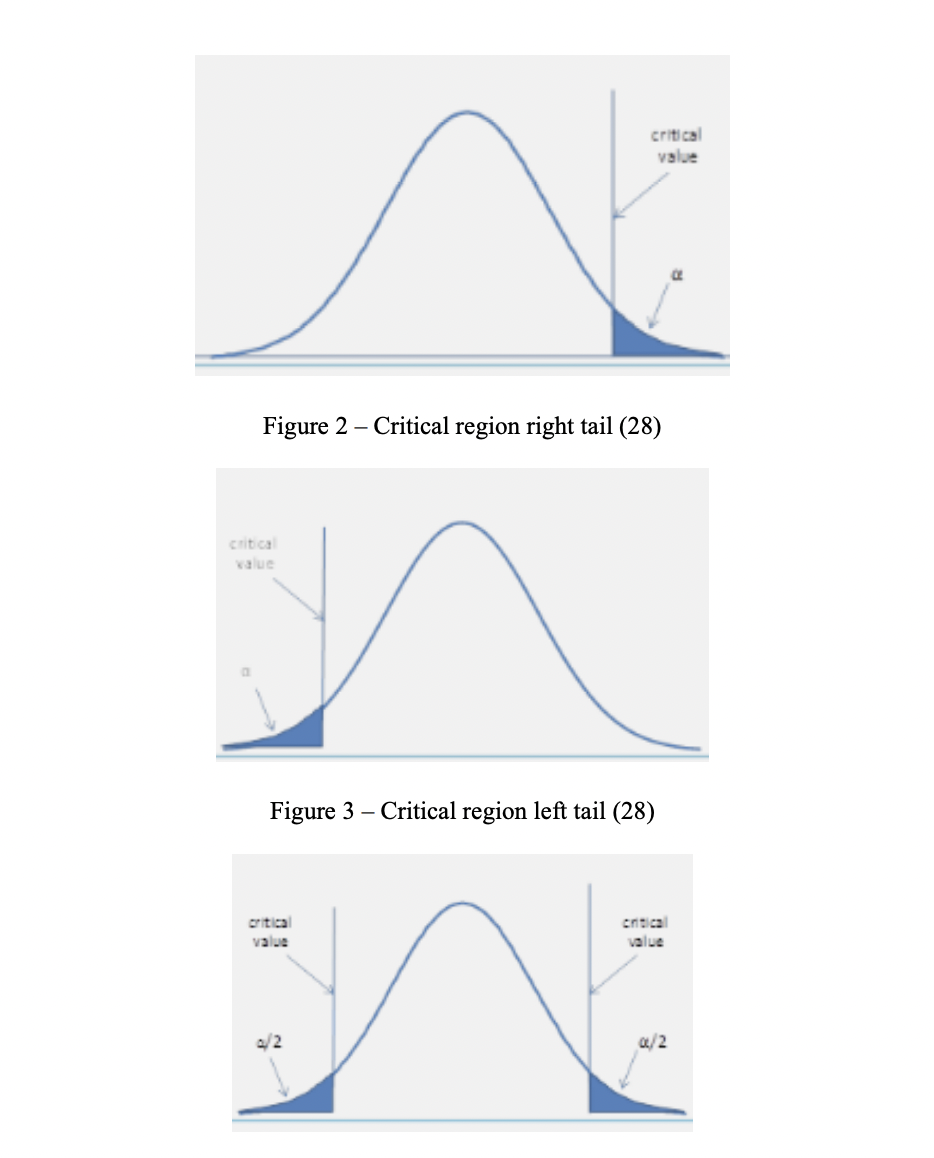


---


In [8]:
from statsmodels.tsa.arima_model import ARIMA

# **New House Sale Price**

In [9]:
series_ = np.asarray(data['new_house_Saleprice'])

In [10]:
model = ARIMA(series_, order=(2,1,3))
model_fit = model.fit()

### **Model one summary ARIMA(2,1,3) for New House Sale Prices**

In [11]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -5232.454
Method:                       css-mle   S.D. of innovations           6251.727
Date:                Tue, 20 Apr 2021   AIC                          10478.909
Time:                        15:39:01   BIC                          10508.618
Sample:                             1   HQIC                         10490.552
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        546.3649     99.268      5.504      0.000     351.803     740.927
ar.L1.D.y     -0.3560      0.501     -0.710      0.478      -1.338       0.626
ar.L2.D.y     -0.2609      0.411     -0.635      0.5

### **Model two summary ARIMA(3,1,2) for New House Sale Prices**



In [12]:
model2 = ARIMA(series_, order=(3,1,2))
model_fit2 = model2.fit()
print(model_fit2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -5226.134
Method:                       css-mle   S.D. of innovations           6173.481
Date:                Tue, 20 Apr 2021   AIC                          10466.267
Time:                        15:39:02   BIC                          10495.977
Sample:                             1   HQIC                         10477.911
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        526.8514    160.096      3.291      0.001     213.069     840.634
ar.L1.D.y      1.0340      0.070     14.777      0.000       0.897       1.171
ar.L2.D.y      0.0837      0.065      1.281      0.2

<Figure size 1440x360 with 0 Axes>

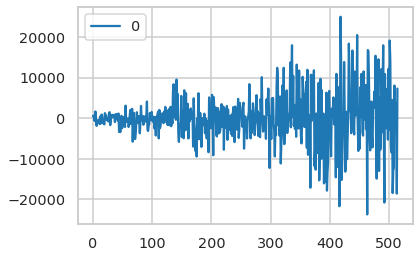

In [13]:
plt.figure(figsize=(20, 5))
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

<Figure size 1440x360 with 0 Axes>

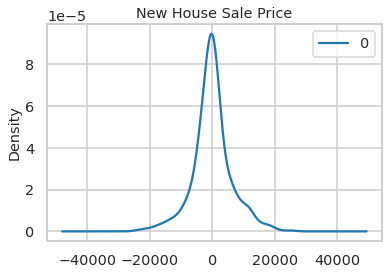

In [14]:
plt.figure(figsize=(20, 5))
residuals.plot(kind='kde')
plt.title('New House Sale Price')
plt.show()

In [15]:
print(residuals.describe())

                  0
count    515.000000
mean       2.793813
std     6257.833085
min   -23689.709553
25%    -2808.959285
50%     -170.795135
75%     2321.223313
max    24992.707592




---
# **House Supply Rate**

In [16]:
series1 = np.asarray(data['house_supply'])

In [17]:
model_house_supply = ARIMA(series1, order=(3,1,2))
model_fit_house_supply = model_house_supply.fit()

In [18]:
print(model_fit_house_supply.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -388.561
Method:                       css-mle   S.D. of innovations              0.515
Date:                Tue, 20 Apr 2021   AIC                            791.122
Time:                        15:39:03   BIC                            820.831
Sample:                             1   HQIC                           802.765
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.016      0.097      0.923      -0.030       0.033
ar.L1.D.y     -0.2882      0.317     -0.908      0.364      -0.910       0.334
ar.L2.D.y      0.2348      0.226      1.038      0.3

<Figure size 1440x360 with 0 Axes>

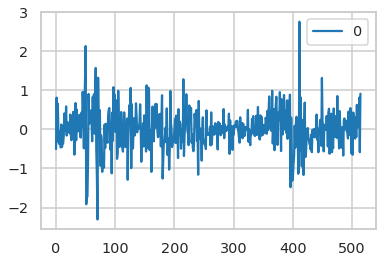

In [19]:
plt.figure(figsize=(20, 5))
residuals_house_supply = pd.DataFrame(model_fit_house_supply.resid)
residuals_house_supply.plot()
plt.show()

<Figure size 1440x360 with 0 Axes>

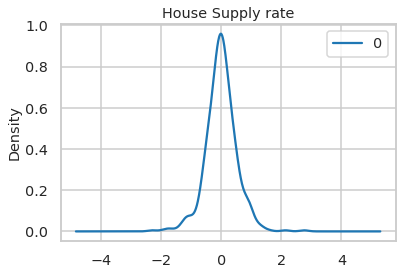

In [20]:
plt.figure(figsize=(20, 5))
residuals_house_supply.plot(kind='kde')
plt.title('House Supply rate')
plt.show()

In [21]:
print(residuals_house_supply.describe())

                0
count  515.000000
mean     0.000024
std      0.515072
min     -2.305048
25%     -0.275397
50%     -0.002500
75%      0.280040
max      2.761093




---
# **Real Estate Loan**

In [22]:
series_real_estate = np.asarray(data['real_estL'])

In [23]:
model_real_estate1 = ARIMA(series_real_estate, order=(2,1,3))
model_fit_real_estate1 = model_real_estate1.fit()

In [24]:
model_real_estate2 = ARIMA(series_real_estate, order=(3,1,2))
model_fit_real_estate2 = model_real_estate2.fit()

In [25]:
print(model_fit_real_estate1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2120.583
Method:                       css-mle   S.D. of innovations             14.850
Date:                Tue, 20 Apr 2021   AIC                           4255.166
Time:                        15:39:05   BIC                           4284.875
Sample:                             1   HQIC                          4266.809
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1058      3.491      2.322      0.021       1.263      14.948
ar.L1.D.y      0.1865      0.137      1.360      0.174      -0.082       0.455
ar.L2.D.y      0.7730      0.134      5.790      0.0

In [26]:
print(model_fit_real_estate2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -2120.853
Method:                       css-mle   S.D. of innovations             14.858
Date:                Tue, 20 Apr 2021   AIC                           4255.706
Time:                        15:39:05   BIC                           4285.415
Sample:                             1   HQIC                          4267.349
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1030      3.483      2.327      0.020       1.277      14.929
ar.L1.D.y      0.1166      0.079      1.475      0.141      -0.038       0.272
ar.L2.D.y      0.9339      0.052     17.835      0.0

<Figure size 1440x360 with 0 Axes>

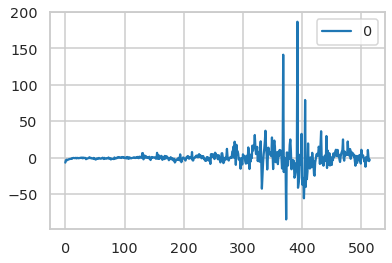

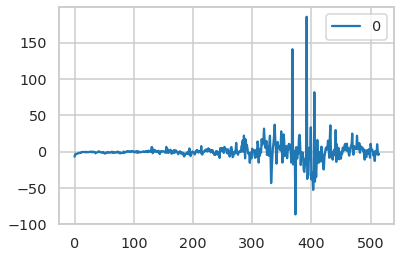

In [27]:
plt.figure(figsize=(20, 5))
residuals_real_estate1 = pd.DataFrame(model_fit_real_estate1.resid)
residuals_real_estate2 = pd.DataFrame(model_fit_real_estate2.resid)
residuals_real_estate1.plot()
residuals_real_estate2.plot()

plt.show()

<Figure size 1440x360 with 0 Axes>

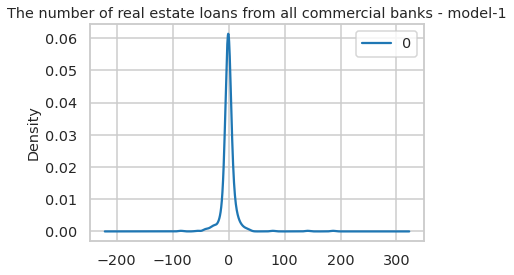

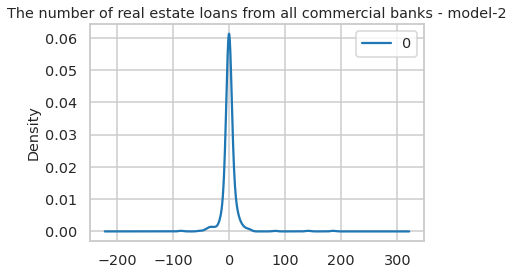

In [28]:
plt.figure(figsize=(20, 5))
residuals_real_estate1.plot(kind='kde')
plt.title('The number of real estate loans from all commercial banks - model-1')
residuals_real_estate2.plot(kind='kde')
plt.title('The number of real estate loans from all commercial banks - model-2')
plt.show()

In [29]:
print("Real Estate order one",residuals_real_estate1.describe(),"\n","Real Estate order two", residuals_real_estate2.describe())

Real Estate order one                 0
count  515.000000
mean     0.116934
std     14.865437
min    -85.168075
25%     -2.584578
50%     -0.523206
75%      2.205872
max    186.775777 
 Real Estate order two                 0
count  515.000000
mean     0.116137
std     14.872780
min    -86.509651
25%     -2.508588
50%     -0.551045
75%      2.108925
max    185.441574




---
# **Persons Income**

In [30]:
series_income = np.asarray(data['income'])

In [31]:
model_income = ARIMA(series_income, order=(3,1,2))
model_income = model_income.fit()

In [32]:
print(model_income.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3521.461
Method:                       css-mle   S.D. of innovations            225.563
Date:                Tue, 20 Apr 2021   AIC                           7056.921
Time:                        15:39:08   BIC                           7086.630
Sample:                             1   HQIC                          7068.564
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.5812      6.552      7.415      0.000      35.740      61.423
ar.L1.D.y      1.0826      0.227      4.761      0.000       0.637       1.528
ar.L2.D.y     -0.5217      0.085     -6.147      0.0

<Figure size 1440x360 with 0 Axes>

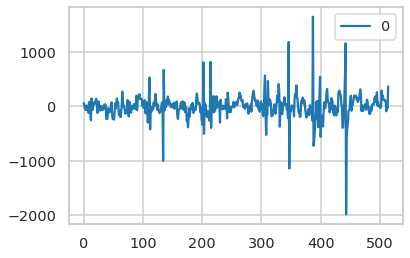

In [33]:
plt.figure(figsize=(20, 5))
residuals_income = pd.DataFrame(model_income.resid)
residuals_income.plot()
plt.show()

<Figure size 1440x360 with 0 Axes>

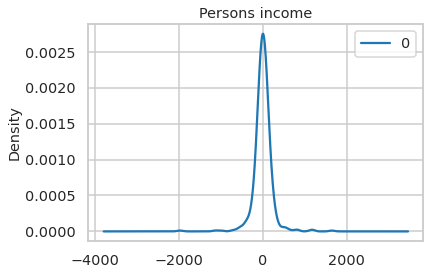

In [34]:
plt.figure(figsize=(20, 5))
residuals_income.plot(kind='kde')
plt.title('Persons income')
plt.show()

In [35]:
print(residuals_income.describe())

                 0
count   515.000000
mean      0.075921
std     225.785369
min   -1985.240960
25%     -84.447410
50%       2.361067
75%      87.914704
max    1648.241259




---
# **Securitized total consumer loans**

In [36]:
series_consumer_loan = np.asarray(data['sec_conL'])

In [37]:
model_consumer_loan1 = ARIMA(series_consumer_loan, order=(2,1,3))
model_consumer_loan1 = model_consumer_loan1.fit()

model_consumer_loan2 = ARIMA(series_consumer_loan, order=(3,1,2))
model_consumer_loan2 = model_consumer_loan2.fit()

In [38]:
print(model_consumer_loan1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -1893.691
Method:                       css-mle   S.D. of innovations              9.560
Date:                Tue, 20 Apr 2021   AIC                           3801.382
Time:                        15:39:10   BIC                           3831.092
Sample:                             1   HQIC                          3813.025
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4967      1.812      4.138      0.000       3.946      11.047
ar.L1.D.y      0.4138      0.359      1.153      0.249      -0.290       1.117
ar.L2.D.y      0.5312      0.345      1.541      0.1

In [39]:
print(model_consumer_loan2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1893.701
Method:                       css-mle   S.D. of innovations              9.560
Date:                Tue, 20 Apr 2021   AIC                           3801.402
Time:                        15:39:10   BIC                           3831.111
Sample:                             1   HQIC                          3813.045
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4964      1.810      4.142      0.000       3.949      11.044
ar.L1.D.y      0.4493      0.408      1.102      0.271      -0.350       1.249
ar.L2.D.y      0.5220      0.370      1.411      0.1

<Figure size 1440x360 with 0 Axes>

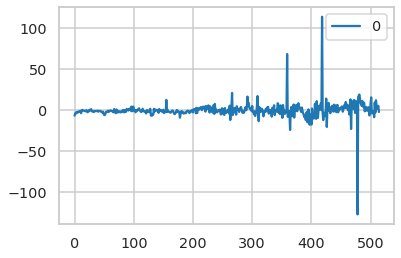

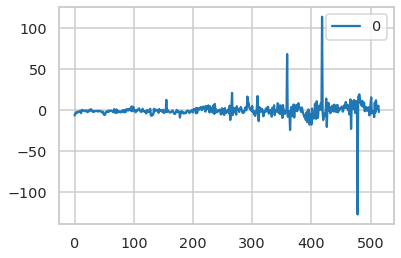

In [40]:
plt.figure(figsize=(20, 5))
residuals_consumer_loan1 = pd.DataFrame(model_consumer_loan1.resid)
residuals_consumer_loan2 = pd.DataFrame(model_consumer_loan2.resid)
residuals_consumer_loan1.plot()
residuals_consumer_loan2.plot()
plt.show()

<Figure size 1440x360 with 0 Axes>

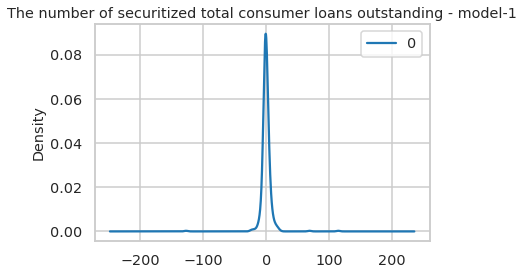

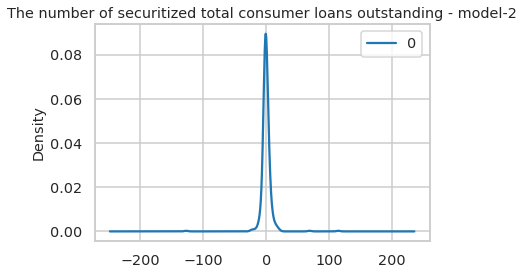

In [41]:
plt.figure(figsize=(20, 5))
residuals_consumer_loan1.plot(kind='kde')
plt.title('The number of securitized total consumer loans outstanding - model-1')
residuals_consumer_loan2.plot(kind='kde')
plt.title('The number of securitized total consumer loans outstanding - model-2')
plt.show()

In [42]:
print("Describe the statistics model-1\n",residuals_consumer_loan1.describe(),"\n\nDescribe the statistics of model-2\n", residuals_consumer_loan2.describe())

Describe the statistics model-1
                 0
count  515.000000
mean     0.075993
std      9.570099
min   -126.999941
25%     -2.187787
50%     -0.657139
75%      2.166988
max    114.340260 

Describe the statistics of model-2
                 0
count  515.000000
mean     0.075815
std      9.570287
min   -127.019792
25%     -2.187702
50%     -0.657797
75%      2.167949
max    114.336443




---
# **The Number of Hosue that are Privetly Owned**

In [43]:
series_private_house = np.asarray(data['hous_st'])

In [44]:
model_private_house1 = ARIMA(series_private_house, order=(2,1,3))
model_private_house1 = model_private_house1.fit()

model_private_house2 = ARIMA(series_private_house, order=(3,1,2))
model_private_house2 = model_private_house2.fit()

In [45]:
print(model_private_house1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -3115.245
Method:                       css-mle   S.D. of innovations            102.306
Date:                Tue, 20 Apr 2021   AIC                           6244.490
Time:                        15:39:13   BIC                           6274.199
Sample:                             1   HQIC                          6256.133
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5158      3.459     -0.149      0.882      -7.296       6.264
ar.L1.D.y     -0.2743      0.185     -1.487      0.138      -0.636       0.087
ar.L2.D.y      0.6380      0.180      3.538      0.0

In [46]:
print(model_private_house2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3116.784
Method:                       css-mle   S.D. of innovations            102.789
Date:                Tue, 20 Apr 2021   AIC                           6247.568
Time:                        15:39:13   BIC                           6277.278
Sample:                             1   HQIC                          6259.212
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5308      3.424     -0.155      0.877      -7.242       6.181
ar.L1.D.y      0.9644      0.091     10.590      0.000       0.786       1.143
ar.L2.D.y     -0.4032      0.077     -5.259      0.0

<Figure size 1440x360 with 0 Axes>

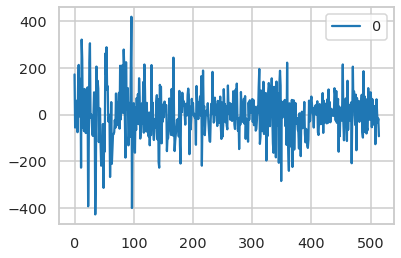

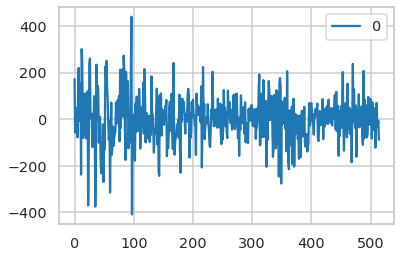

In [47]:
plt.figure(figsize=(20, 5))
residuals_private_house1 = pd.DataFrame(model_private_house1.resid)
residuals_private_house2 = pd.DataFrame(model_private_house2.resid)
residuals_private_house1.plot()
residuals_private_house2.plot()
plt.show()

<Figure size 1440x360 with 0 Axes>

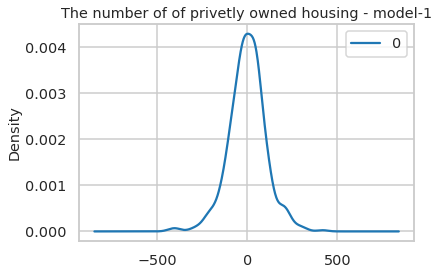

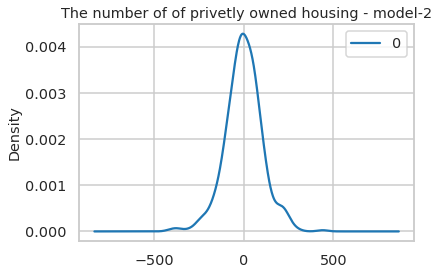

In [48]:
plt.figure(figsize=(20, 5))
residuals_private_house1.plot(kind='kde')
plt.title('The number of of privetly owned housing - model-1')
residuals_private_house2.plot(kind='kde')
plt.title('The number of of privetly owned housing - model-2')
plt.show()

In [49]:
print("Describe the statistics model-1\n",residuals_private_house1.describe(),"\n\nDescribe the statistics of model-2\n", residuals_private_house2.describe())

Describe the statistics model-1
                 0
count  515.000000
mean     0.085297
std    102.760360
min   -426.168400
25%    -58.248119
50%      0.463249
75%     55.615014
max    417.878996 

Describe the statistics of model-2
                 0
count  515.000000
mean     0.131126
std    102.955807
min   -408.579344
25%    -60.882674
50%     -1.779797
75%     60.197586
max    439.766580




---
# **Real Mortgage Interest Rate**

In [50]:
series_mortgage_rate = np.asarray(data['mortgR'])

In [51]:
model_mortgage_rate1 = ARIMA(series_mortgage_rate, order=(3,1,2))
model_mortgage_rate1 = model_mortgage_rate1.fit()

model_mortgage_rate2 = ARIMA(series_mortgage_rate, order=(2,1,3))
model_mortgage_rate2 = model_mortgage_rate2.fit()

In [52]:
print(model_mortgage_rate1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 -15.826
Method:                       css-mle   S.D. of innovations              0.249
Date:                Tue, 20 Apr 2021   AIC                             45.652
Time:                        15:39:16   BIC                             75.361
Sample:                             1   HQIC                            57.295
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0088      0.016     -0.554      0.579      -0.040       0.022
ar.L1.D.y      0.4633      0.385      1.203      0.230      -0.292       1.218
ar.L2.D.y     -0.5330      0.164     -3.247      0.0

In [53]:
print(model_mortgage_rate2.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  515
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 -15.591
Method:                       css-mle   S.D. of innovations              0.249
Date:                Tue, 20 Apr 2021   AIC                             45.182
Time:                        15:39:16   BIC                             74.891
Sample:                             1   HQIC                            56.825
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0088      0.016     -0.561      0.575      -0.039       0.022
ar.L1.D.y     -0.0138      0.275     -0.050      0.960      -0.552       0.525
ar.L2.D.y     -0.5516      0.150     -3.680      0.0

<Figure size 1440x360 with 0 Axes>

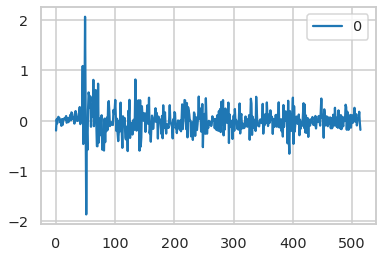

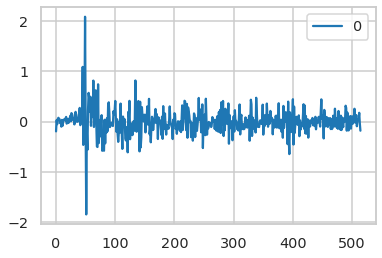

In [54]:
plt.figure(figsize=(20, 5))
residuals_mortgage_rate1 = pd.DataFrame(model_mortgage_rate1.resid)
residuals_mortgage_rate2 = pd.DataFrame(model_mortgage_rate2.resid)
residuals_mortgage_rate1.plot()
residuals_mortgage_rate2.plot()
plt.show()

<Figure size 1440x360 with 0 Axes>

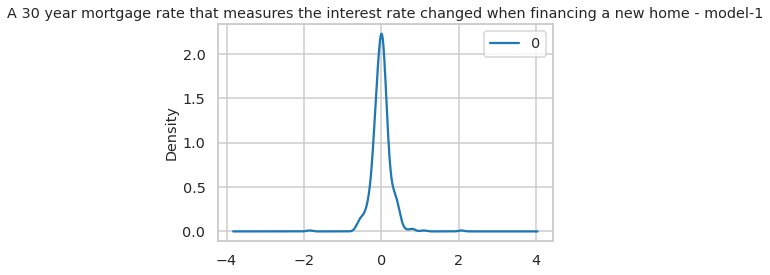

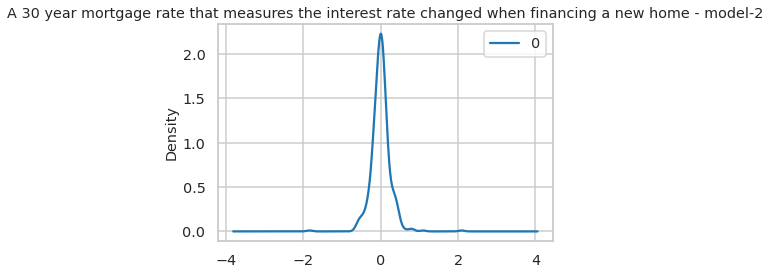

In [55]:
plt.figure(figsize=(20, 5))
residuals_mortgage_rate1.plot(kind='kde')
plt.title('A 30 year mortgage rate that measures the interest rate changed when financing a new home - model-1')
residuals_mortgage_rate2.plot(kind='kde')
plt.title('A 30 year mortgage rate that measures the interest rate changed when financing a new home - model-2')
plt.show()

In [56]:
print("Describe the statistics model-1\n",residuals_mortgage_rate1.describe(),"\n\nDescribe the statistics of model-2\n", residuals_mortgage_rate2.describe())

Describe the statistics model-1
                 0
count  515.000000
mean     0.000059
std      0.249699
min     -1.862486
25%     -0.119550
50%     -0.002059
75%      0.104201
max      2.067629 

Describe the statistics of model-2
                 0
count  515.000000
mean     0.000053
std      0.249584
min     -1.847628
25%     -0.118261
50%     -0.001708
75%      0.105186
max      2.086799




---

# **Linear Combinations**

1. House Privetly owned 
2. New House Sale Price
3. House Supply Rate

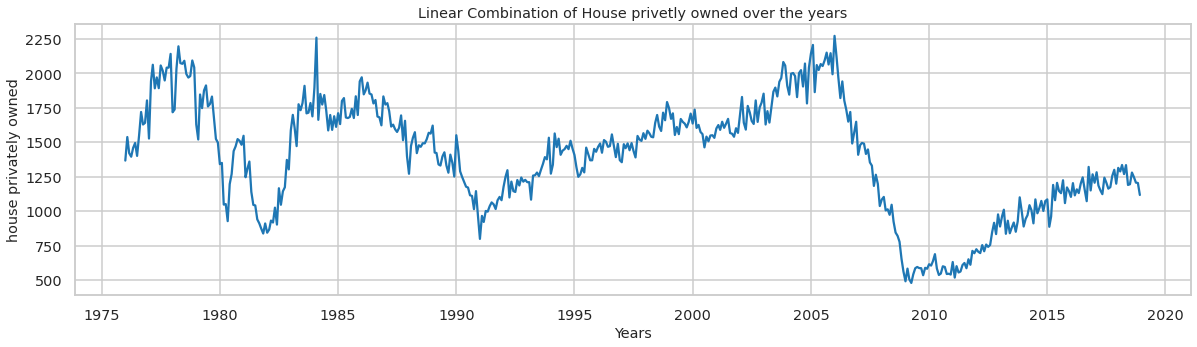

In [57]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['hous_st'])
plt.xlabel('Years')
plt.ylabel('house privately owned')
plt.title('Linear Combination of House privetly owned over the years')
plt.show()

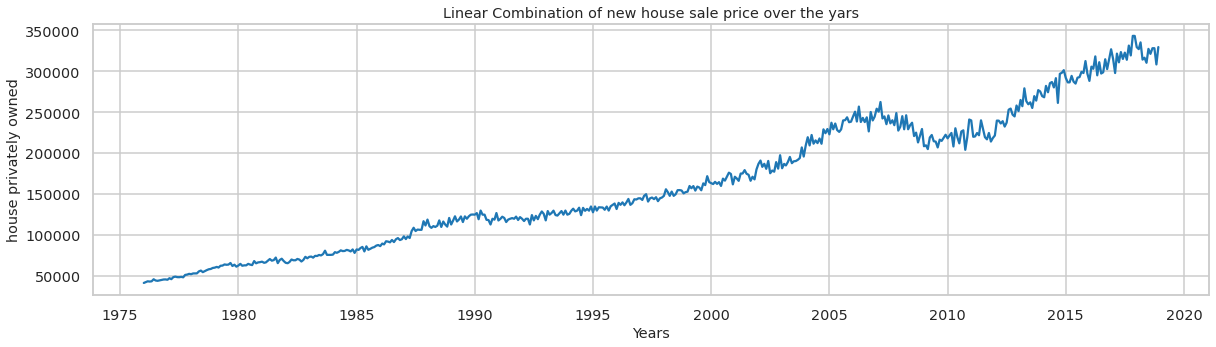

In [58]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['new_house_Saleprice'])
plt.xlabel('Years')
plt.ylabel('house privately owned')
plt.title('Linear Combination of new house sale price over the yars')
plt.show()

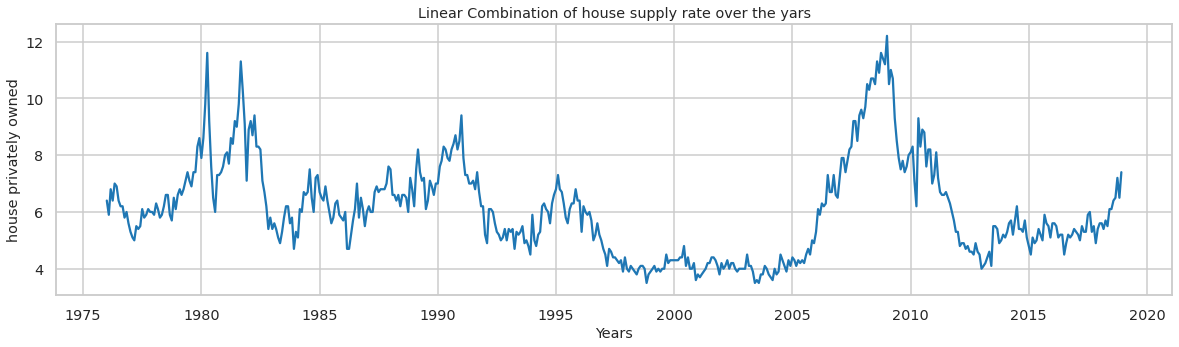

In [59]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['house_supply'])
plt.xlabel('Years')
plt.ylabel('house privately owned')
plt.title('Linear Combination of house supply rate over the yars')
plt.show()

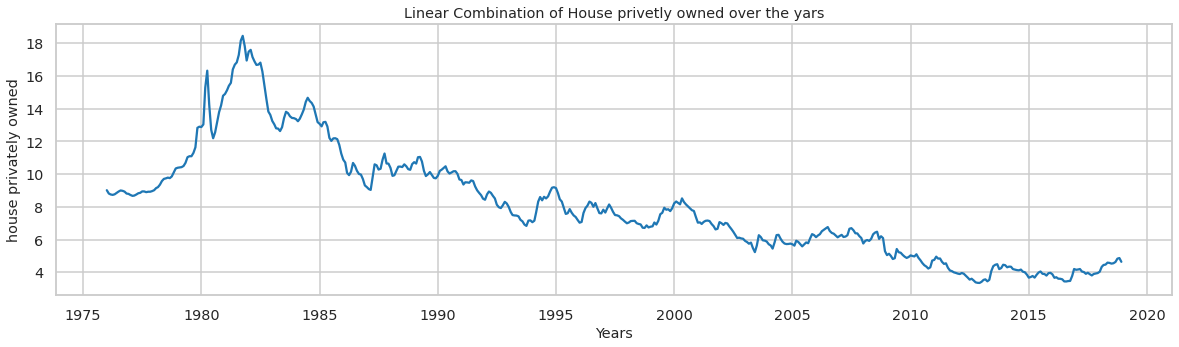

In [60]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['mortgR'])
plt.xlabel('Years')
plt.ylabel('house privately owned')
plt.title('Linear Combination of House privetly owned over the yars')
plt.show()



---



In [61]:
serie = pd.read_excel('/content/US_House_dataset.xlsx')

In [62]:
serie.head()

,date,hous_st,CPI,mortgR,fed_fundsR,income,pvt_house_comp,sec_conL,real_estL,unempR,house_supply,new_house_Saleprice
0,1976-01-01,1367,52.6,9.0160,4.87,20092,1258,205.52079,134.995775,7.9,6.4,41600
1,1976-02-01,1538,52.8,8.8125,4.77,20203,1311,206.70929,136.105200,7.7,5.9,42700
2,1976-03-01,1421,52.9,8.7550,4.84,20251,1347,208.33857,137.876240,7.6,6.8,43600
3,1976-04-01,1395,53.1,8.7300,4.82,20263,1332,210.50006,139.842425,7.7,6.4,43300
4,1976-05-01,1459,53.2,8.7650,5.29,20248,1440,211.40742,140.843875,7.4,7.0,43600


# **Check Stationarity**
* Plotting rolling statistics: we can plot moving average and moving variance
* Dickey Fuller test: It is statistical test to check stationarity,

1.   Null Hypothesis H0: Time series is non stationary
2.   Altenate Hypothesis H1: If test statics < critical value reject H0


Hypothesis testing:

Defining and evaluating hypotheses is a very critical part of statistical inference. In order to perform this task, some theory should be setup put forward, either because that theory is believed to eb true or because it is to be used as a basis for argument, but has not been proved. Each problem leads simply into two competing hypotheses; the null hypothesis, denoted H0 against the alternative hypothesis, denoted H1.


Null Hypothesis:

The null hypothesis, H0, represents a theory that the researcher puts forward, either because it is believed that it is true or because it will be used as a basis for argument, but has not been proved so far. The null hypotheses had a special consideration because the null hypothesis relates to the statement being tested. while the alternative hypothesis relates to the statement to be accepted if the null was rejected.

Alternative hypothesis:

The alternative hypothesis, H1, is a statement of what a statistical hypothesis test is set up for.

Type-1 Error:

In a hypothesis test, a type 1 error occurs when the researcer rejects the null hypothesis while it is true in fact. Type 1 error is often considered to be more serious than type-2 error. The significance level is considered to guarantee 'low' probability of rejecting the null hypothesis wrongly; this probability is never have zero value. The probability of a type 1 error could be computed a  P (type I error) = significance level = α.

Type-2 Error:

If the researcher did not reject the null hypothesis, it may still be false that may happen because the sample is not big enough to identify the falseness of the null hypothesis. The exact probability of a type 2 error is usally unknown. It is usually symbolized as β.

For any Hypotheses testing for any set if data, type-1 and type-2 erros are inversely related; the higher the tisk of one, the smaller the risk of the other.








---


# **House Supply Rate**


---



In [63]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

In [64]:
series = serie.set_index('date')
series['date'] = pd.to_datetime(serie['date'])

In [65]:
ts = series['house_supply']
ts.head()

date
1976-01-01    6.4
1976-02-01    5.9
1976-03-01    6.8
1976-04-01    6.4
1976-05-01    7.0
Name: house_supply, dtype: float64

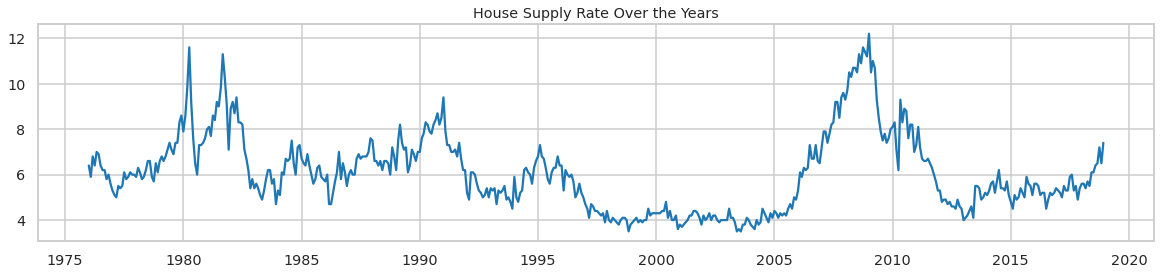

In [66]:
plt.figure(figsize=(20,4))
plt.plot(ts)
plt.title('House Supply Rate Over the Years')
plt.show()

Perfom Dickey fuller test
Test Statistic                  -2.409003
p-value                          0.139212
#Lags Used                       4.000000
Number of Observations Used    511.000000
Critical Value (1%)             -3.443212
Critical Value (5%)             -2.867213
Critical Value (10%)            -2.569791
dtype: float64


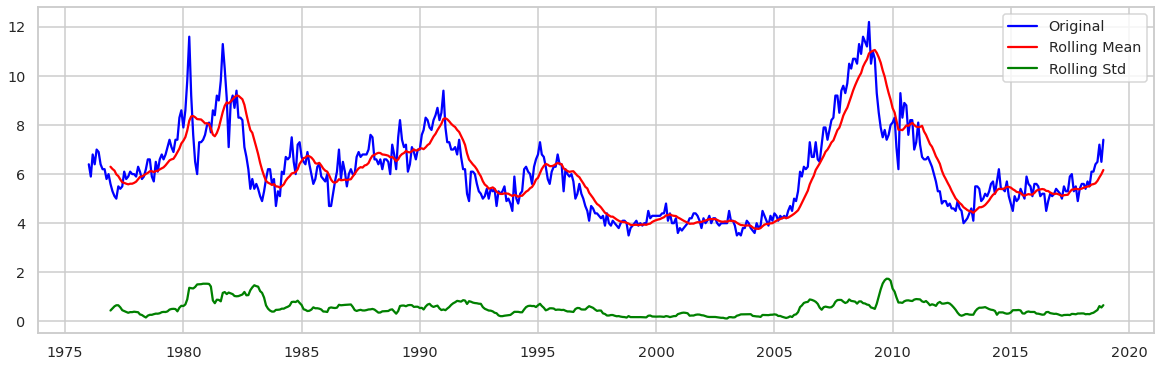

In [67]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(20,6))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    #plt.title('Statistics of House Supply Rate into the House Market')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

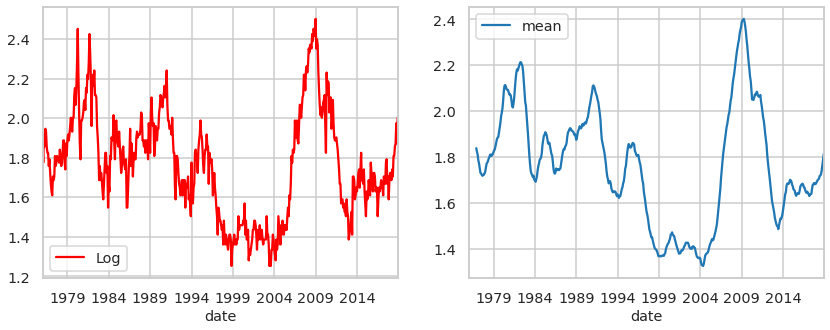

In [68]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

ts_log = np.log(ts)
ts_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

ts_ma = ts_log.rolling(12).mean()
ts_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

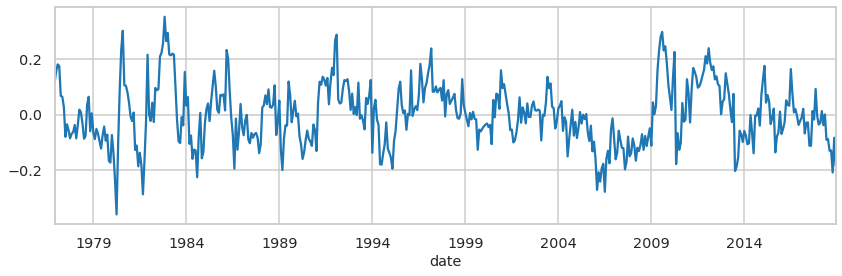

In [69]:
plt.figure(figsize=(14,4))
ts_dif = ts_ma - ts_log
ts_dif = ts_dif.dropna() # fill na
ts_dif.plot()

Perfom Dickey fuller test
Test Statistic                -6.876604e+00
p-value                        1.469144e-09
#Lags Used                     1.000000e+00
Number of Observations Used    5.030000e+02
Critical Value (1%)           -3.443418e+00
Critical Value (5%)           -2.867303e+00
Critical Value (10%)          -2.569840e+00
dtype: float64


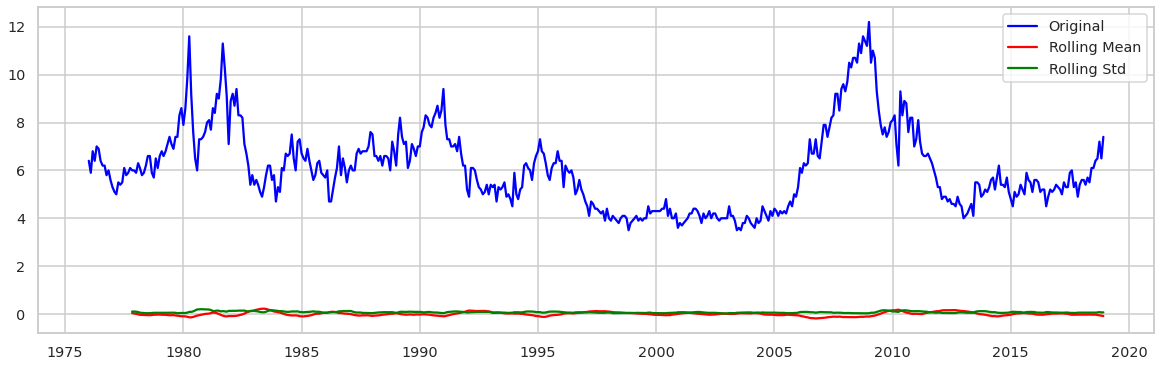

In [70]:
test_stationarity(ts_dif)

# **Eliminating Trend and seasonality for House Supply Rate**
1. Differencing: taking difference with perticualar time lag
2. Decomposing: Modelling both trend and seasonality and removing them from the model

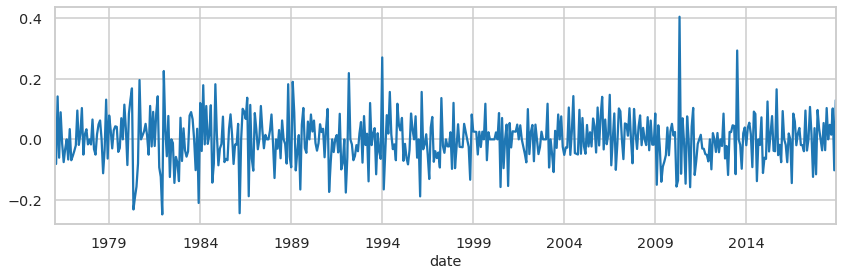

In [71]:
# Differencing
ts_log_dif = ts_log - ts_log.shift()
plt.figure(figsize=(14,4))
ts_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                -1.379459e+01
p-value                        8.797701e-26
#Lags Used                     3.000000e+00
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64


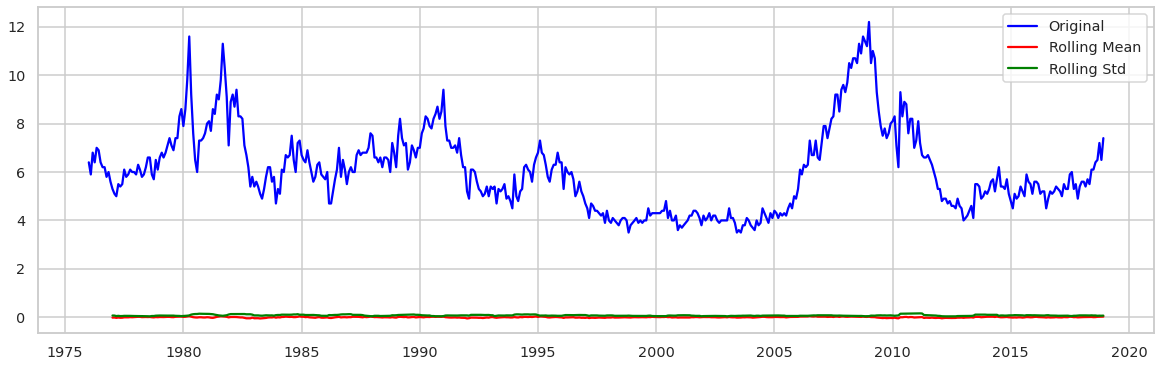

In [72]:
ts_log_dif.dropna(inplace = True)
test_stationarity(ts_log_dif)

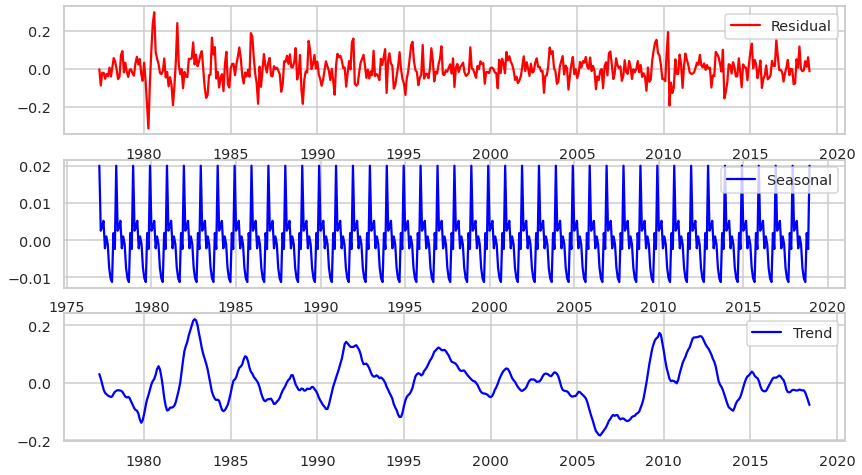

In [73]:
# Decomposing
docom = seasonal_decompose(ts_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')



---


#**Real Mortgage Interest Rate**


---



In [74]:
st1 = series['mortgR']
st1.head()

date
1976-01-01    9.0160
1976-02-01    8.8125
1976-03-01    8.7550
1976-04-01    8.7300
1976-05-01    8.7650
Name: mortgR, dtype: float64

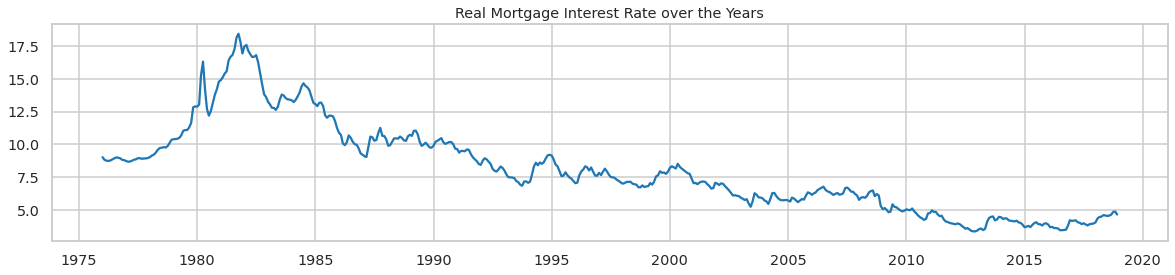

In [75]:
plt.figure(figsize=(20,4))
plt.plot(st1)
plt.title('Real Mortgage Interest Rate over the Years')
plt.show()

Perfom Dickey fuller test
Test Statistic                  -0.955468
p-value                          0.769158
#Lags Used                       3.000000
Number of Observations Used    512.000000
Critical Value (1%)             -3.443187
Critical Value (5%)             -2.867202
Critical Value (10%)            -2.569785
dtype: float64


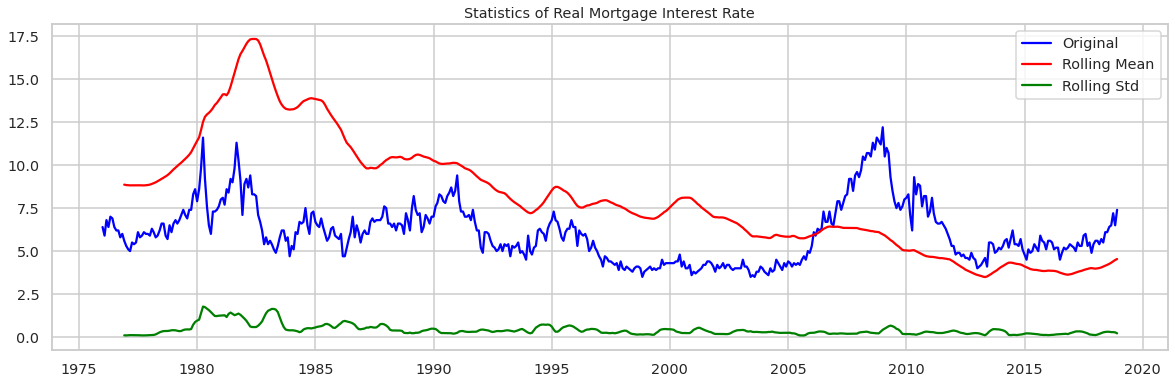

In [76]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(20,6))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.title('Statistics of Real Mortgage Interest Rate')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(st1)

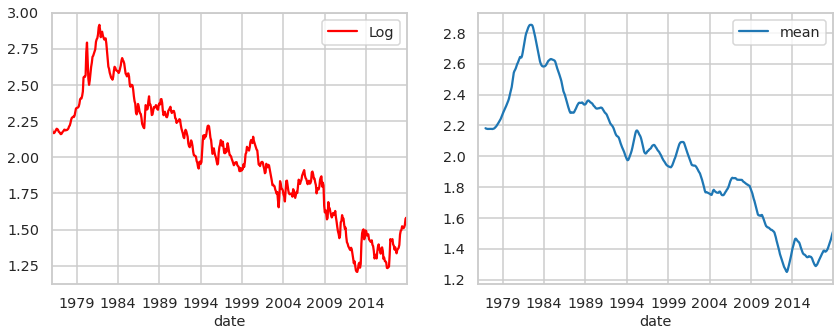

In [77]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

st1_log = np.log(st1)
st1_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

st1_ma = st1_log.rolling(12).mean()
st1_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

# **Eliminating Trend and seasonality for Mortgage Interest Rate**
1. Differencing: taking difference with perticualar time lag
2. Decomposing: Modelling both trend and seasonality and removing them from the model

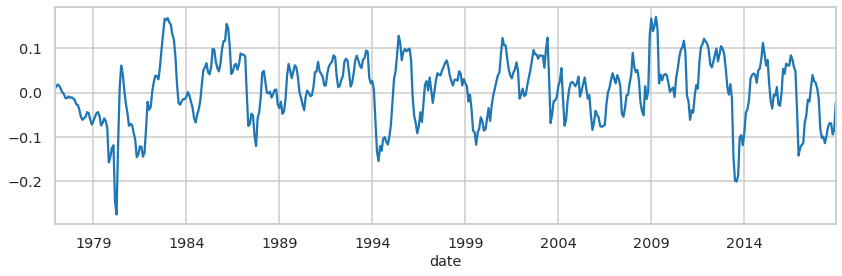

In [78]:
plt.figure(figsize=(14,4))
st1_dif = st1_ma - st1_log
st1_dif = st1_dif.dropna() # fill na
st1_dif.plot()

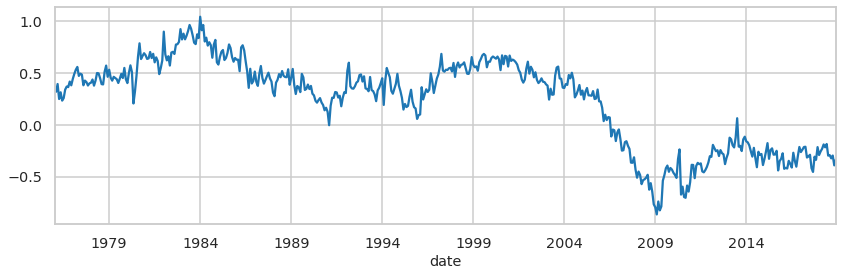

In [79]:
st1_log_dif = st1_log - ts_log.shift()
plt.figure(figsize=(14,4))
st1_log_dif.plot()

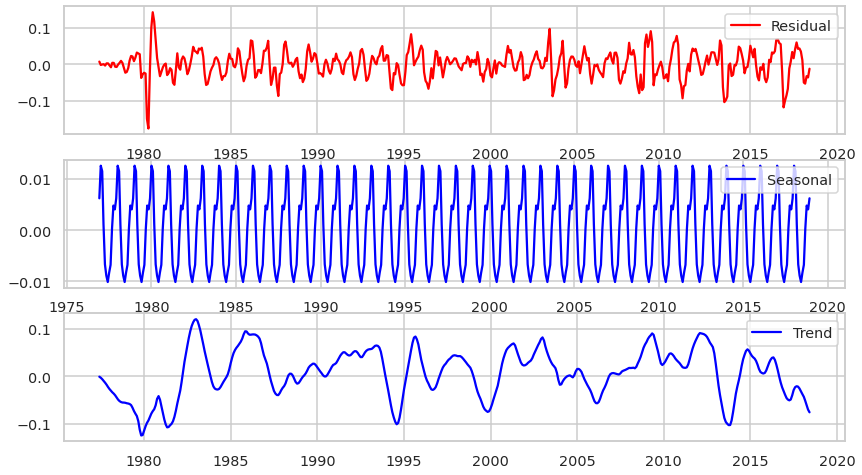

In [80]:
# Decomposing
docom = seasonal_decompose(st1_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

# **Consumer Price Index**

In [81]:
st2 = series['CPI']
st2.head()

date
1976-01-01    52.6
1976-02-01    52.8
1976-03-01    52.9
1976-04-01    53.1
1976-05-01    53.2
Name: CPI, dtype: float64

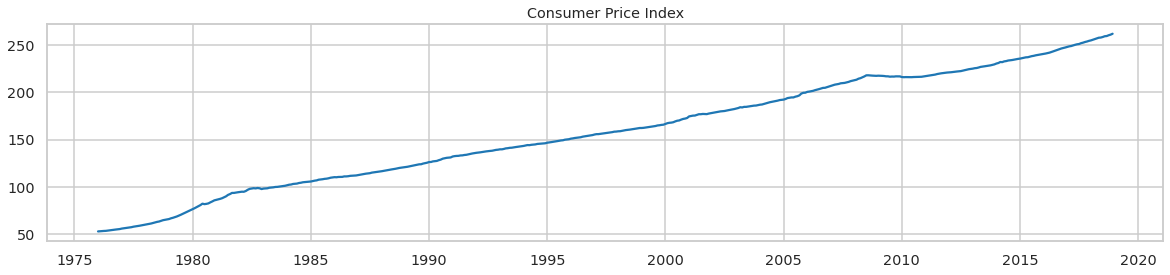

In [82]:
plt.figure(figsize=(20,4))
plt.plot(st2)
plt.title('Consumer Price Index')
plt.show()

Perfom Dickey fuller test
Test Statistic                  -0.378132
p-value                          0.913686
#Lags Used                       8.000000
Number of Observations Used    507.000000
Critical Value (1%)             -3.443314
Critical Value (5%)             -2.867258
Critical Value (10%)            -2.569815
dtype: float64


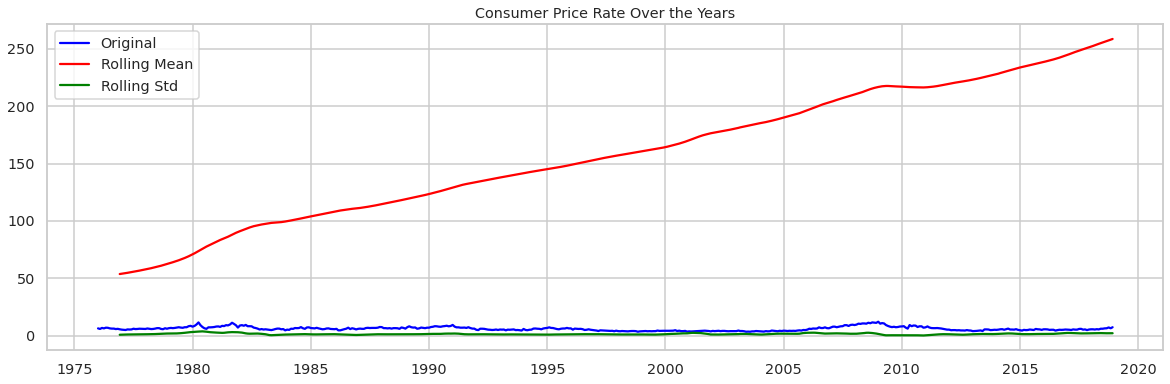

In [83]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(20,6))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.title('Consumer Price Rate Over the Years')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(st2)

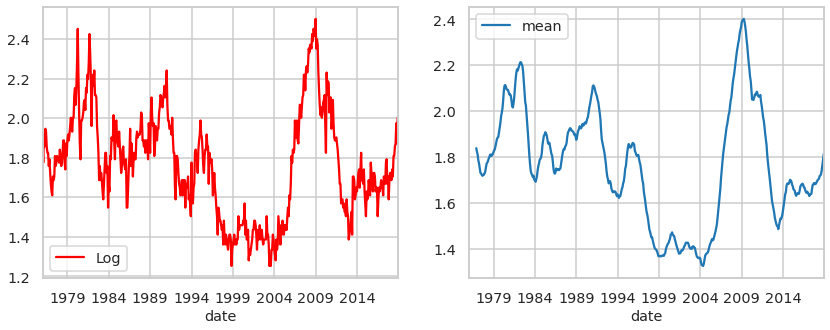

In [84]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

st2_log = np.log(ts)
st2_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

st2_ma = st2_log.rolling(12).mean()
st2_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

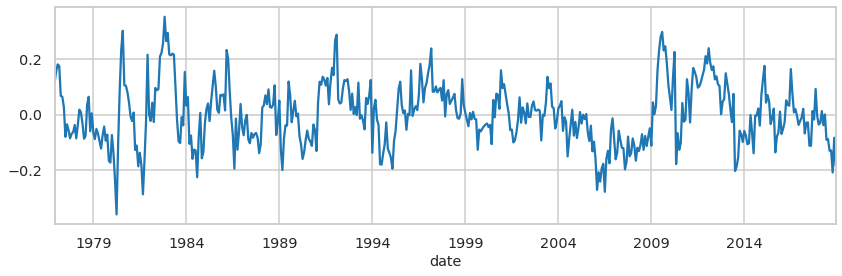

In [85]:
plt.figure(figsize=(14,4))
st2_dif = st2_ma - st2_log
st2_dif = st2_dif.dropna() # fill na
st2_dif.plot()

# **Eliminating Trend and seasonality for Consumer Price Index¶**
1.Differencing: taking difference with perticualar time lag

2.Decomposing: Modelling both trend and seasonality and removing them from the model

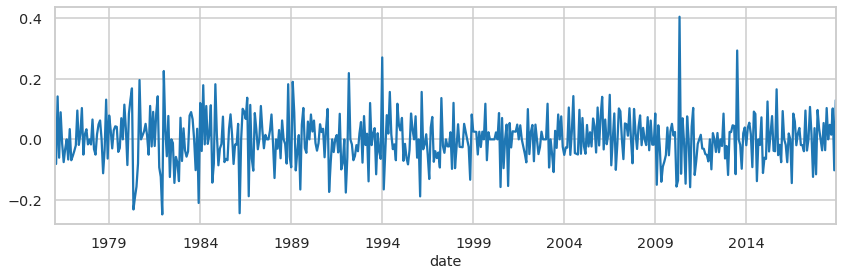

In [86]:
st2_log_dif = st2_log - st2_log.shift()
plt.figure(figsize=(14,4))
st2_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                -1.379459e+01
p-value                        8.797701e-26
#Lags Used                     3.000000e+00
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64


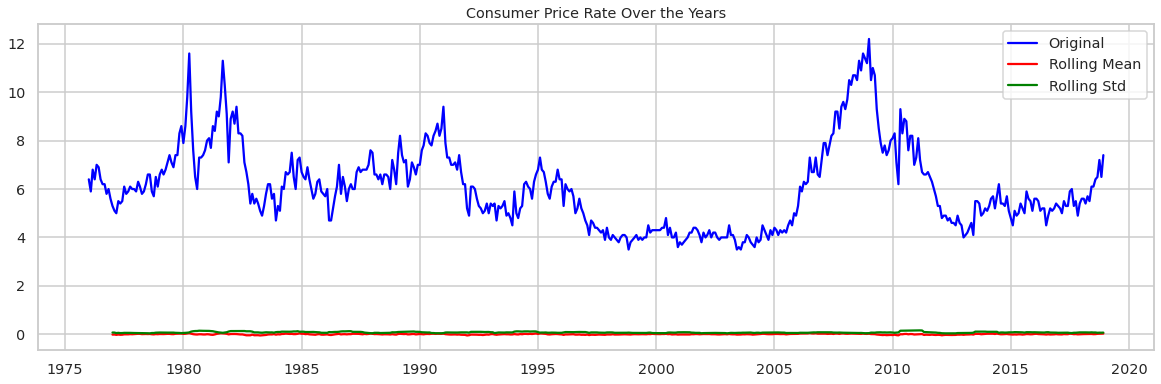

In [87]:
st2_log_dif.dropna(inplace = True)
test_stationarity(st2_log_dif)

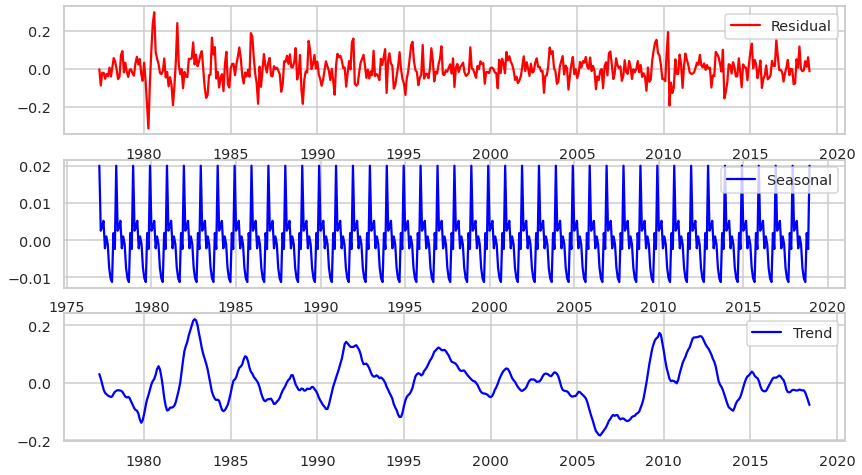

In [88]:
# Decomposing
docom = seasonal_decompose(st2_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')



---


# **The number of privetly owned housing**


---


In [89]:
st3 = series['hous_st']
st3.head()

date
1976-01-01    1367
1976-02-01    1538
1976-03-01    1421
1976-04-01    1395
1976-05-01    1459
Name: hous_st, dtype: int64

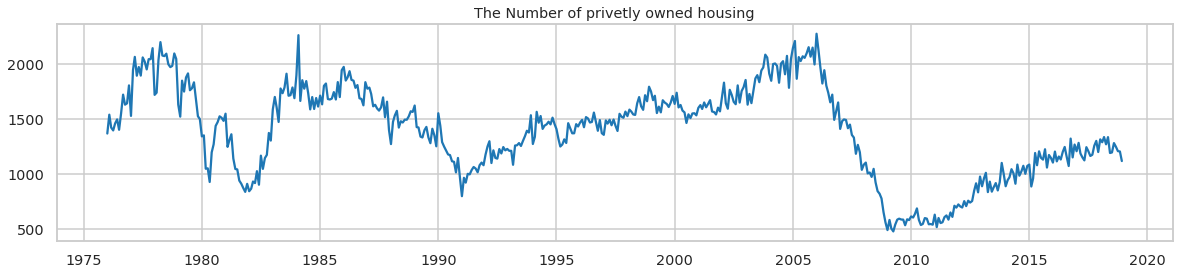

In [90]:
plt.figure(figsize=(20,4))
plt.plot(st3)
plt.title('The Number of privetly owned housing')
plt.show()

Perfom Dickey fuller test
Test Statistic                  -3.012740
p-value                          0.033722
#Lags Used                      16.000000
Number of Observations Used    499.000000
Critical Value (1%)             -3.443523
Critical Value (5%)             -2.867350
Critical Value (10%)            -2.569864
dtype: float64


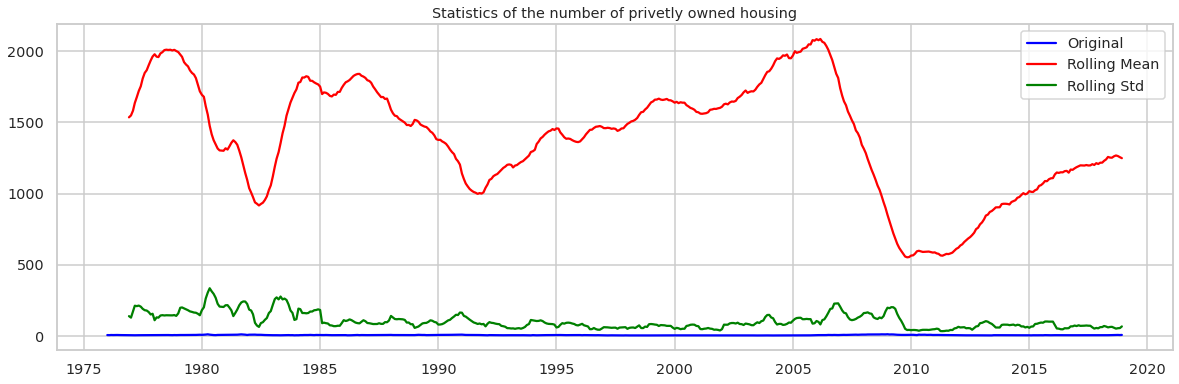

In [91]:
def test_stationarity(timeseries):
    
    #rolling statics
    rol_mean = timeseries.rolling(window = 12).mean()
    rol_std = timeseries.rolling(window = 12).std()
    
    #plot rolling statistics
    plt.figure(figsize=(20,6))
    plt.plot(ts, color = 'b', label = 'Original')
    plt.plot(rol_mean, color = 'r', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'g', label = 'Rolling Std')
    plt.title('Statistics of the number of privetly owned housing')
    plt.legend(loc='best')
    
    # Dickey fuller test
    print('Perfom Dickey fuller test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(st3)

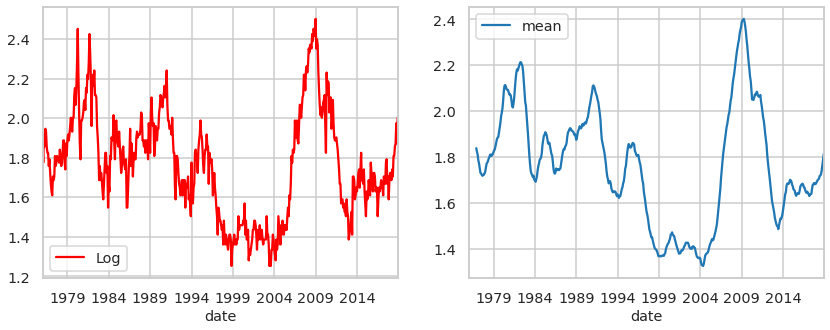

In [92]:
fig,ax = plt.subplots(1,2,figsize=(14,5))
ax1, ax2 = ax.flatten()

st3_log = np.log(ts)
st3_log.plot(ax=ax1, label = 'Log',color = 'r')
ax1.legend(loc = 'best')

st3_ma = st2_log.rolling(12).mean()
st3_ma.plot(ax = ax2, label = 'mean')
ax2.legend(loc = 'best')

# **Eliminating Trend and seasonality for the number of privetly owned housing¶**
1.Differencing: taking difference with perticualar time lag

2.Decomposing: Modelling both trend and seasonality and removing them from the model

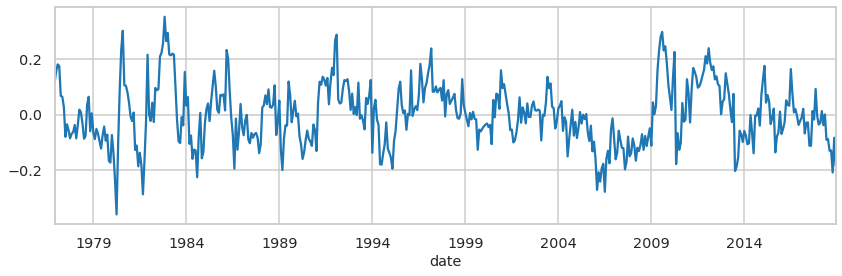

In [93]:
plt.figure(figsize=(14,4))
st3_dif = st3_ma - st3_log
st3_dif = st3_dif.dropna() # fill na
st3_dif.plot()

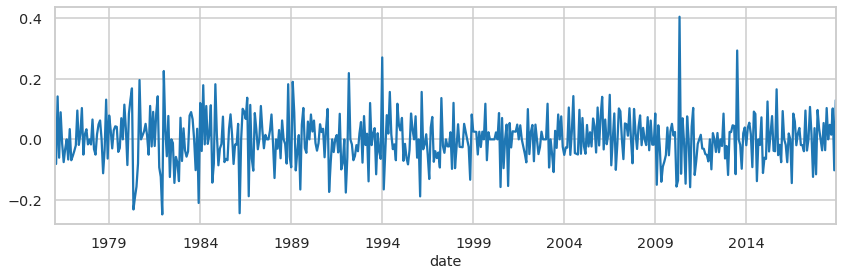

In [94]:
# Differencing
st3_log_dif = st3_log - st3_log.shift()
plt.figure(figsize=(14,4))
st3_log_dif.plot()

Perfom Dickey fuller test
Test Statistic                -1.379459e+01
p-value                        8.797701e-26
#Lags Used                     3.000000e+00
Number of Observations Used    5.110000e+02
Critical Value (1%)           -3.443212e+00
Critical Value (5%)           -2.867213e+00
Critical Value (10%)          -2.569791e+00
dtype: float64


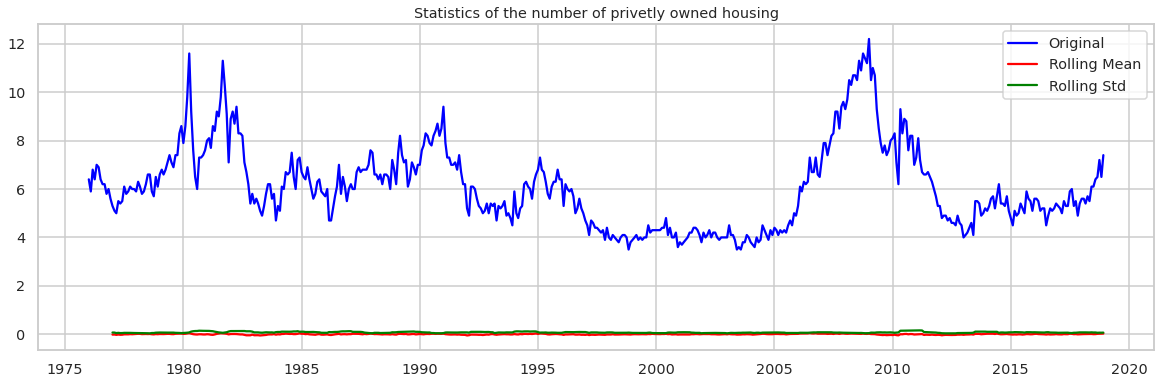

In [95]:
st3_log_dif.dropna(inplace = True)
test_stationarity(st3_log_dif)

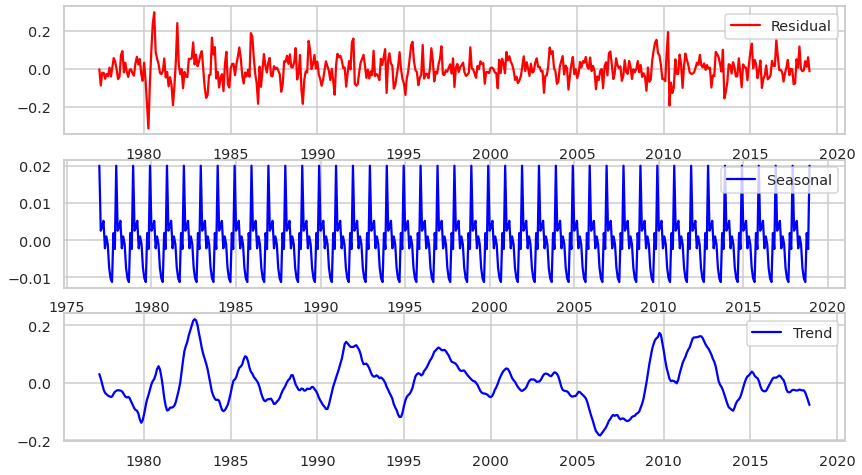

In [96]:
# Decomposing
docom = seasonal_decompose(st3_dif)
fig,ax = plt.subplots(3,1,figsize=(14,8))
ax
ax[0].plot(docom.resid,label = 'Residual', color = 'r')
ax[0].legend(loc= 'best')
ax[1].plot(docom.seasonal, label = 'Seasonal', color = 'b')
ax[1].legend(loc = 'best')
ax[2].plot(docom.trend,  label = 'Trend', color = 'b')
ax[2].legend(loc = 'best')

# **Forecasting time series Using ARIMA**

The ARIMA forcasting for stationary time series is Linear equation (like linear regression). The predictor depend on (p, d, q) of Arima model.



*   **ARIMA: Auto Regressor Integrated Moving Average**
    1. Number of AR (Auto regressor) term (p): AR term is lag of dependent variable. If p is 3 then predictor for x(t) will be x(t-1)...(t-3)
    2. Number of MA (Moving Average) term (q): MA term is lag of forcast error of predictor equation. If q is 3 then for x(t) will be e(t-1)...e(t-3).
    3. Number of Differences(d): The number of times that the raw observations are differenced, also called the degree of differencing.

*   To determine p and q we will use two plots
    1. Auto Correlation Function ACF: it is a measure of correlation between TS and lagged of TS (q)
    2. Partial Auto Correlation Function PACF: This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons.(p)



In [97]:
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

# **House Supply Rate Forecasting time series suing ARIMA**

In [98]:
# ACF
lag_acf = acf(ts_dif,nlags=20)
#PACF
lag_pacf = pacf(ts_dif, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


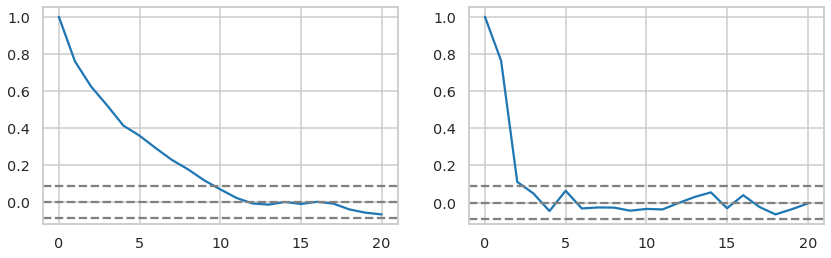

In [99]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(ts_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(ts_dif)), linestyle = '--', color = 'gray')

Note: The dotted lines in confidence interval, this can be used to determine **p** and **q**.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.house_supply   No. Observations:                  504
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 618.152
Method:                       css-mle   S.D. of innovations              0.071
Date:                Tue, 20 Apr 2021   AIC                          -1220.304
Time:                        15:39:45   BIC                          -1186.524
Sample:                    01-01-1977   HQIC                         -1207.053
                         - 12-01-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.836e-05      0.000     -0.524      0.601      -0.000       0.000
ar.L1.D.house_supply     0.6802      0.045     15.273      0.000       0.593       0.768
ar.L2.D.hous

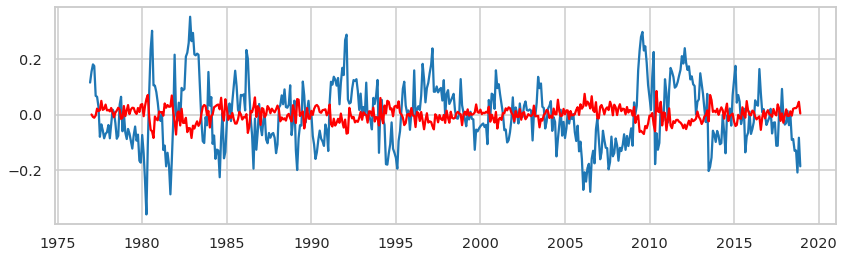

In [100]:
model_House_Supply_Rate = ARIMA(ts_dif, order = (5,1,1))
model_fit_House_Supply_Rate = model_House_Supply_Rate.fit(disp=5)
print(model_fit_House_Supply_Rate.summary())
plt.figure(figsize=(14,4))
plt.plot(ts_dif)
plt.plot(model_fit_House_Supply_Rate.fittedvalues,color = 'r')

## **Real Mortgage Rate Forecasting time series forecasting using ARIMA**

In [101]:
# ACF
lag_acf_mortgage_rate = acf(st1_dif,nlags=20)
#PACF
lag_pacf_mortgage_rate = pacf(st1_dif, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


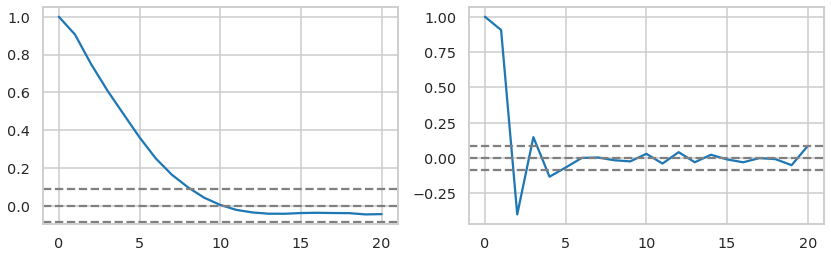

In [102]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf_mortgage_rate)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(st1_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(st1_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf_mortgage_rate,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(st1_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(st1_dif)), linestyle = '--', color = 'gray')

NOTE: The dotted lines in confidence interval, this can be used to determine p and q.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.mortgR   No. Observations:                  504
Model:                 ARIMA(5, 1, 1)   Log Likelihood                1110.126
Method:                       css-mle   S.D. of innovations              0.027
Date:                Tue, 20 Apr 2021   AIC                          -2204.251
Time:                        15:39:49   BIC                          -2170.471
Sample:                    01-01-1977   HQIC                         -2191.000
                         - 12-01-2018                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.831e-05   5.95e-05      0.644      0.520   -7.82e-05       0.000
ar.L1.D.mortgR     1.3342      0.045     29.974      0.000       1.247       1.421
ar.L2.D.mortgR    -0.6381      0.074

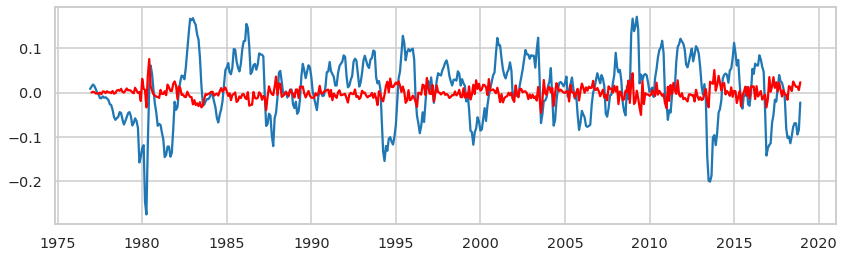

In [103]:
model_mortgage_rate = ARIMA(st1_dif, order = (5,1,1))
model_fit_mortgage_rate = model_mortgage_rate.fit(disp=5)
print(model_fit_mortgage_rate.summary())
plt.figure(figsize=(14,4))
plt.plot(st1_dif)
plt.plot(model_fit_mortgage_rate.fittedvalues,color = 'r')

# **Consumer Price Index Forecasting time series using ARIMA**

In [104]:
# ACF
lag_acf_cpi = acf(st2_dif,nlags=20)
#PACF
lag_pacf_cpi = pacf(st2_dif, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


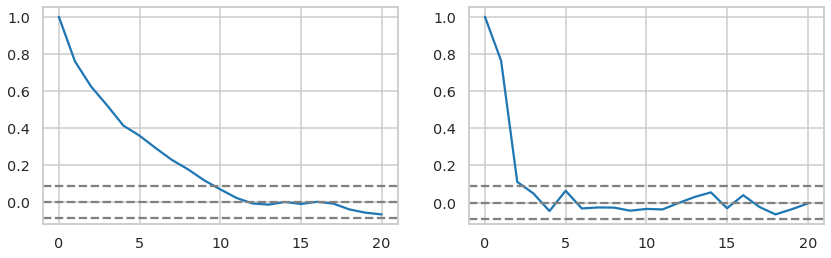

In [105]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf_cpi)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(st2_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(st2_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf_cpi,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(st2_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(st2_dif)), linestyle = '--', color = 'gray')

NOTE: The dotted lines in confidence interval, this can be used to determine p and q.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.house_supply   No. Observations:                  504
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 618.152
Method:                       css-mle   S.D. of innovations              0.071
Date:                Tue, 20 Apr 2021   AIC                          -1220.304
Time:                        15:39:52   BIC                          -1186.524
Sample:                    01-01-1977   HQIC                         -1207.053
                         - 12-01-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.836e-05      0.000     -0.524      0.601      -0.000       0.000
ar.L1.D.house_supply     0.6802      0.045     15.273      0.000       0.593       0.768
ar.L2.D.hous

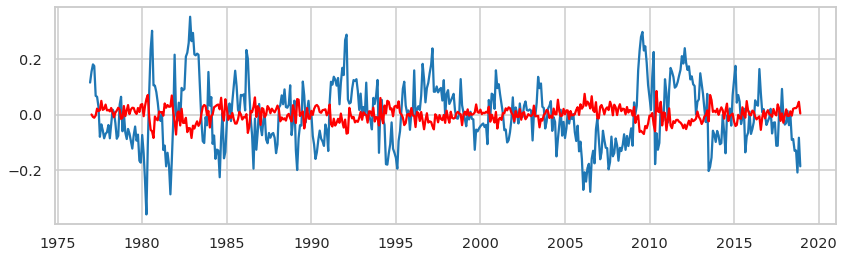

In [106]:
model_cpi = ARIMA(st2_dif, order = (5,1,1))
model_fit_cpi = model_cpi.fit(disp=5)
print(model_fit_cpi.summary())
plt.figure(figsize=(14,4))
plt.plot(st2_dif)
plt.plot(model_fit_cpi.fittedvalues,color = 'r')

# **The Number of Privetly Owned house Forecasting time series using ARIMA**

In [107]:
# ACF
lag_acf_house_st = acf(st3_dif,nlags=20)
#PACF
lag_pacf_house_st = pacf(st3_dif, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


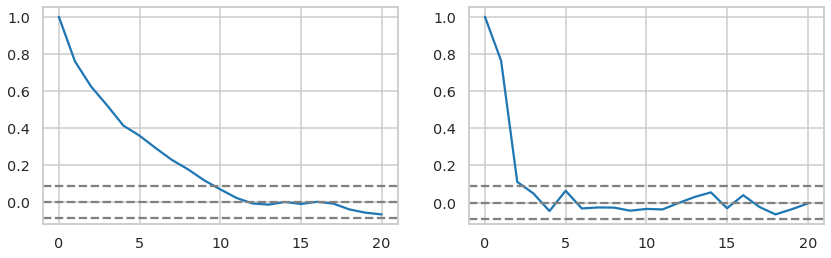

In [108]:
fig,ax = plt.subplots(1,2, figsize=(14,4))
ax1, ax2 = ax.flatten()
ax1.plot(lag_acf_house_st)
ax1.axhline(y=0,linestyle='--',color= 'gray')
ax1.axhline(y= - 1.96/np.sqrt(len(st3_dif)), linestyle='--',color= 'gray')
ax1.axhline(y=  1.96/np.sqrt(len(st3_dif)), linestyle='--',color= 'gray')

ax2.plot(lag_pacf_house_st,)
ax2.axhline(y=0,linestyle = '--', color = 'gray')
ax2.axhline(y = -1.96/np.sqrt(len(st3_dif)), linestyle = '--', color = 'gray')
ax2.axhline(y = 1.96/np.sqrt(len(st3_dif)), linestyle = '--', color = 'gray')

NOTE: The dotted lines in confidence interval, this can be used to determine p and q.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.house_supply   No. Observations:                  504
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 618.152
Method:                       css-mle   S.D. of innovations              0.071
Date:                Tue, 20 Apr 2021   AIC                          -1220.304
Time:                        15:39:55   BIC                          -1186.524
Sample:                    01-01-1977   HQIC                         -1207.053
                         - 12-01-2018                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.836e-05      0.000     -0.524      0.601      -0.000       0.000
ar.L1.D.house_supply     0.6802      0.045     15.273      0.000       0.593       0.768
ar.L2.D.hous

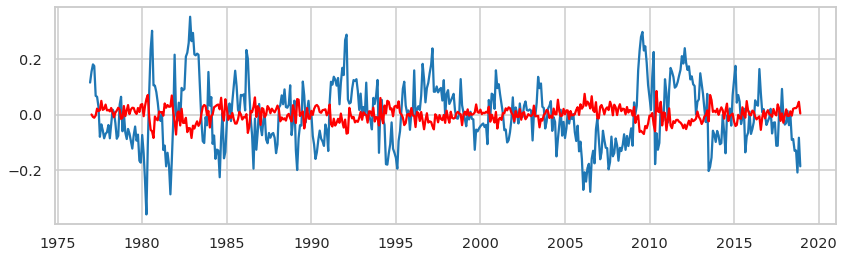

In [109]:
model_house_st = ARIMA(st3_dif, order = (5,1,1))
model_fit_house_st = model_house_st.fit(disp=5)
print(model_fit_house_st.summary())
plt.figure(figsize=(14,4))
plt.plot(st3_dif)
plt.plot(model_fit_house_st.fittedvalues,color = 'r')

# **Future Features(variables) to be add**

**Inflation:**
  
  The increase in inflation rate raises the cost of new onctruction. When inflation is high, the cost of materials rises, and the labor costs also rises as well. Therefore, is believed that higher inflation rate may affects to some extent the construction industry and hosuing demand.

**Personal Consumption expenditures:**
  
  It is an economic indicator that explains how consumers are spending on good and services in the US. It shows how much of the income earned by households is being spent on current consumptions. One-third of the personal expenditure is to be spent on housing. This costs includes the explicit payments of rent by residentials tenants and implicit space rent of owner-occupiers. As assumption has been made that there is relationship between the personal consumption and the market demand.